<a href="https://colab.research.google.com/github/pedro-pauletti/deeplearning-pytorch/blob/main/Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

### Creating Dataset

In [3]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [4]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

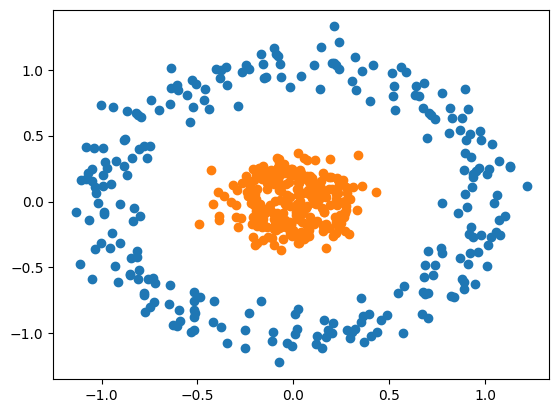

In [5]:
scatter_plot()

### Model Setup

In [6]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [7]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


### Model Training

In [11]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [12]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print('epoch: ', i, 'loss: ', loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



epoch:  0 loss:  0.03219417855143547
epoch:  1 loss:  0.03053552471101284
epoch:  2 loss:  0.02900422178208828
epoch:  3 loss:  0.027608318254351616
epoch:  4 loss:  0.026248469948768616
epoch:  5 loss:  0.024970540776848793
epoch:  6 loss:  0.023766178637742996
epoch:  7 loss:  0.022605037316679955
epoch:  8 loss:  0.021522533148527145
epoch:  9 loss:  0.020521612837910652
epoch:  10 loss:  0.01957591623067856
epoch:  11 loss:  0.018680959939956665
epoch:  12 loss:  0.0178434569388628
epoch:  13 loss:  0.017055246978998184
epoch:  14 loss:  0.016307106241583824
epoch:  15 loss:  0.015602768398821354
epoch:  16 loss:  0.01494472473859787
epoch:  17 loss:  0.014326530508697033
epoch:  18 loss:  0.013742819428443909
epoch:  19 loss:  0.013193643651902676
epoch:  20 loss:  0.012678029015660286
epoch:  21 loss:  0.012191261164844036
epoch:  22 loss:  0.01172972097992897
epoch:  23 loss:  0.011293451301753521
epoch:  24 loss:  0.010882914997637272
epoch:  25 loss:  0.010496200062334538
epoc

Text(0.5, 0, 'epoch')

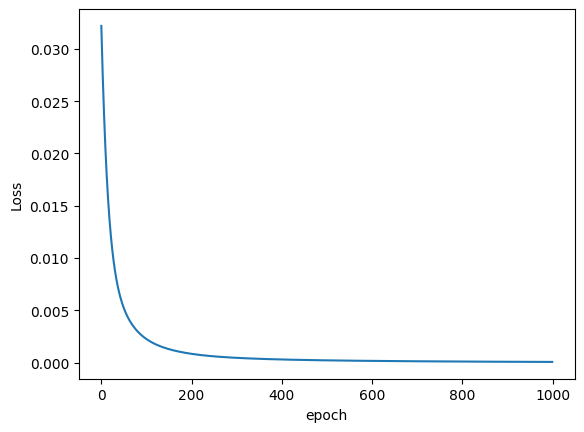

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

### Model Testing

In [16]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

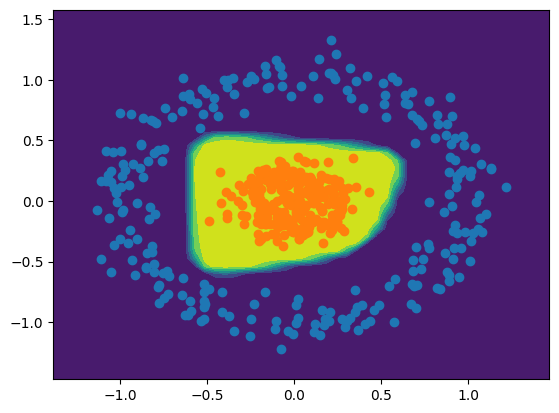

In [17]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is  1


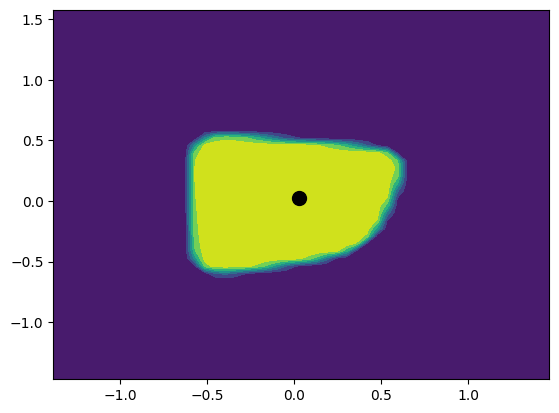

In [23]:
x = 0.025
y = 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='black')
print('Prediction is ', prediction)
plot_decision_boundary(X, y)